# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Authorization for Hospital Admission Data

The AIH datasets contains data on hospital production and services in Brazil. The data that will be used here is the Authorization for Hospital Admission. This dataset is part of `Brazil’s SIHSUS Hospital Information System`. This system manages the coordination and payment by Brazil’s public healthcare system (covers around 34% of Brazil’s population). In this application, I will be using data from 2015 – 2018. This represents 3.5 years’ of information.

A record in the AIH database is created when a hospital or healthcare unit generates a request for hospitalization. Providers submit demographic and health information about the patient. This request is ultimately approved or rejected. While the patient is in the hospital, the record is updated to also contain information about procedures performed and discharge. 

More information about this data can be found below: 

* [DataSUS Website](http://datasus.saude.gov.br/informacoes-de-saude)
* [AIH Data Fields](https://github.com/IvetteMTapia/Capstone-2_Deep_Learning/blob/master/IT_SIHSUS_1603_DataDict.pdf)

## Upload Random Sampled Data

Upload random sample created from the AIH 2015 - 2018 files.

In [2]:
%%time

AIH_sample_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')

AIH_sample = pd.read_csv(AIH_sample_path, 
                         encoding = 'UTF-8', 
                         na_values= ['NaN',' ',''],
                         low_memory=True)

<string>:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1min 49s, sys: 25.9 s, total: 2min 15s
Wall time: 2min 18s


In [3]:
AIH_sample.index.name = 'index_name'

In [4]:
AIH_sample.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329642 entries, 0 to 8329641
Data columns (total 69 columns):
UF_ZI         8329642 non-null int64
ANO_CMPT      8329642 non-null int64
MES_CMPT      8329642 non-null int64
ESPEC         8329642 non-null int64
CGC_HOSP      6282752 non-null float64
N_AIH         8329642 non-null int64
IDENT         8329642 non-null int64
CEP           8329642 non-null int64
MUNIC_RES     8329642 non-null int64
NASC          8329642 non-null int64
SEXO          8329642 non-null int64
UTI_MES_TO    8329642 non-null int64
MARCA_UTI     8329642 non-null int64
UTI_INT_TO    8329642 non-null int64
DIAR_ACOM     8329642 non-null int64
QT_DIARIAS    8329642 non-null int64
PROC_SOLIC    8329642 non-null int64
PROC_REA      8329642 non-null int64
VAL_SH        8329642 non-null float64
VAL_SP        8329642 non-null float64
VAL_TOT       8329642 non-null float64
VAL_UTI       8329642 non-null float64
US_TOT        8329642 non-null float64
DT_INTER      8329642 no

### Create column blocks

The purpose of this to to slice the columns avaibale by 'theme' so they are easirer to explore. 

In [6]:
meta = ['UF_ZI','ANO_CMPT','MES_CMPT','CGC_HOSP','N_AIH',
       'IDENT','CEP','NAT_JUR','NATUREZA','GESTAO','MUNIC_MOV',
        'COD_IDADE','SEQ_AIH5','CNAER','VINCPREV','GESTOR_COD',
        'GESTOR_TP','GESTOR_CPF','CNES','SEQUENCIA','HOMONIMO']

pat_charc = ['MUNIC_RES','NASC','SEXO','IDADE','MORTE',
             'NACIONAL','NUM_FILHOS','INSTRU','GESTRISCO','CBOR',
             'RACA_COR','ETNIA']

diag = ['DIAG_PRINC','DIAG_SECUN']

hospi_serv = ['UTI_MES_TO','MARCA_UTI','UTI_INT_TO',
              'DIAR_ACOM','QT_DIARIAS','PROC_SOLIC',
              'PROC_REA','DT_INTER','DT_SAIDA','COBRANCA',
              'IND_VDRL','DIAS_PERM','CONTRACEP1','CONTRACEP2',
              'INSC_PN','CID_ASSO','CID_MORTE','COMPLEX',
              'MARCA_UCI','ESPEC','CAR_INT']


finan = ['VAL_SH','VAL_SP','VAL_TOT','VAL_UTI','US_TOT',
         'FINANC','REGCT','REMESSA', 'VAL_SH_FED',
         'VAL_SP_FED','VAL_SH_GES','VAL_SP_GES','VAL_UCI']


In [8]:
# Sanity check. Make sure I have all the columns accounted for.

col_check = len(meta) + len(pat_charc) + len(diag) + len(hospi_serv) + len(finan)

sample_cols = list(AIH_sample.columns.values)

print('Columsn in df, same as colums sliced?:',col_check == len(sample_cols))

Columsn in df, same as colums sliced?: True


### Create Dictionary of Variable Definitions for Reference

In [9]:
var_spread_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/IT_SIHSUS_1603_DataDict.xlsx')

var_df = pd.read_excel(var_spread_path, index_col = 'Field_Name')

var_def_dict = var_df.to_dict(orient = 'index')

var_def_dict

{'UF_ZI': {'Type of Field': 'char(6)', 'Description': 'Municipality Manager'},
 'ANO_CMPT': {'Type of Field': 'char(4)',
  'Description': 'Year of AIH processing, in yyyy format.'},
 'MÊS_CMPT': {'Type of Field': 'char(2)',
  'Description': 'Month of AIH processing, in mm format.'},
 'ESPEC': {'Type of Field': 'char(2)', 'Description': 'Specialty of Bed'},
 'CGC_HOSP': {'Type of Field': 'char(14)',
  'Description': 'CNPJ of the Establishment'},
 'N_AIH': {'Type of Field': 'char(13)', 'Description': 'Number of AIH'},
 'IDENT': {'Type of Field': 'char(1)',
  'Description': 'Identification of the type of AIH'},
 'CEP': {'Type of Field': 'char(8)', 'Description': 'CEP of the patient'},
 'MUNIC_RES': {'Type of Field': 'char(6)',
  'Description': "Municipality of Patient's Residence"},
 'NASC': {'Type of Field': 'char(8)',
  'Description': 'Date of birth of the patient (yyyammdd)'},
 'SEXO': {'Type of Field': 'char(1)', 'Description': 'Sex of patient'},
 'UTI_MES_IN': {'Type of Field': 'nume

## Demographics Data Bloc Initial Exploration and Wrangling

> **Create demographics dataframe**

In [50]:
pat_charc_data = AIH_sample[pat_charc]

pat_charc_data.head(10)

,MUNIC_RES,NASC,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA
index_name,,,,,,,,,,,,
0,355030,19820321,3,33,0,10,0,0,1,0,3,0
1,530010,20150819,1,0,0,10,0,0,1,0,99,0
2,160030,19850903,3,30,0,10,0,0,1,0,3,0
3,150080,20030209,1,12,0,10,0,0,1,0,3,0
4,315750,19810624,1,34,0,10,0,0,1,0,3,0
5,313630,19980618,3,17,0,10,0,0,1,0,99,0
6,520110,19711120,1,43,0,10,0,0,1,0,3,0
7,230250,19361001,1,79,0,10,0,0,1,0,1,0
8,355370,19500623,3,65,0,10,0,0,1,0,1,0


In [16]:
pat_charc_data.describe()

,MUNIC_RES,NASC,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA
count,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06
mean,3.277015e+05,1.975996e+07,2.171629e+00,3.968477e+01,4.134487e-02,1.015701e+01,2.223409e-02,1.994107e-02,9.990338e-01,3.052517e+01,2.772210e+01,2.537580e-01
std,9.430158e+04,2.450011e+05,9.851618e-01,2.412030e+01,1.990866e-01,3.466309e+00,2.745826e-01,2.288340e-01,3.106855e-02,3.333605e+03,4.276135e+01,6.505445e+00
min,1.100010e+05,1.888030e+07,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.614500e+05,1.956072e+07,1.000000e+00,2.100000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,3.303900e+05,1.979093e+07,3.000000e+00,3.600000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
75%,4.101000e+05,1.995011e+07,3.000000e+00,5.900000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.900000e+01,0.000000e+00
max,5.301800e+05,2.018073e+07,3.000000e+00,9.900000e+01,1.000000e+00,3.500000e+02,6.300000e+01,4.000000e+00,1.000000e+00,8.485100e+05,9.900000e+01,2.640000e+02


**Demographics Bloc Descriptive Findings:** 

+ **MUNIC_RES:** Municipality is coded in k's.
+ **NASC:** This is date of birth. 
+ **SEX:** Coded 1 to 3. 
+ **AGE:** Is a number. Min is 0, Max is 99. 99's are likely missing values representation. 
+ **MORTE:** Indicator of death, 0 or 1. 
+ **NACIONAL:** Nationality, coded 1 to 350.
+ **NUM_FILHOS:** Number of children of the patient.  This is a number. Min 0, Max 63 (this is unlikely to be right). 75th pct is 0. 
+ **INSTRU:** Degree of instruction of the patient (i.e. education level). Min 0, Max 4.
+ **GESTRISCO:** Pregnant at risk indicator. Min 0, Max 1
+ **CBOR:** Occupation of the patient. Min 0, Max 848,510.
+ **RACA_COR:** Race of the patient. Min 0, Max 99. 99's are missing values representation.
+ **ETNIA:** Ethnicity of the patient. Used if race is indigenous. Min 0, Max 264. 

*Question: Where 0's are missing representations?*

> **Convert date of birth to datetime object**

In [19]:
# Convert date of birth to datetime object.

pat_charc_data['NASC'] = pat_charc_data['NASC'].astype('datetime64[ns]')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


> **Number of Children Greater > 15 (these are very suspect)**

In [52]:
# Filter by number of children (greater than 15 children). These are suspect entries.

print('Rows with number of children > 15: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] > 15]))

print('Rows with number of children = 0: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] == 0]))

Rows with number of children > 15:  26
Rows with number of children = 0:  8263019


> **Create Plots of Categorical Variables**

In [24]:
# Create counts by categories

count_muni = pd.DataFrame(pat_charc_data.MUNIC_RES.value_counts()).reset_index()
count_sexo = pd.DataFrame(pat_charc_data.SEXO.value_counts()).reset_index()
count_morte = pd.DataFrame(pat_charc_data.MORTE.value_counts()).reset_index()
count_instru = pd.DataFrame(pat_charc_data.INSTRU.value_counts()).reset_index()
count_naci = pd.DataFrame(pat_charc_data.NACIONAL.value_counts()).reset_index()
count_gest = pd.DataFrame(pat_charc_data.GESTRISCO.value_counts()).reset_index()
count_cbor = pd.DataFrame(pat_charc_data.CBOR.value_counts()).reset_index()
count_raca = pd.DataFrame(pat_charc_data.RACA_COR.value_counts()).reset_index()
count_etnia = pd.DataFrame(pat_charc_data.ETNIA.value_counts()).reset_index()

Text(0.5,1,'Sex of the Patient')

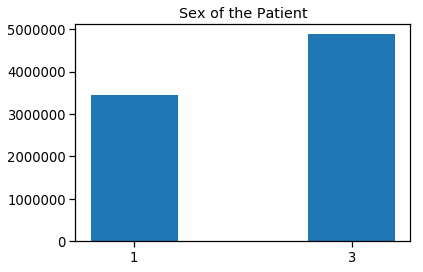

In [25]:
# Sex of the patient 

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_sexo['index'], height = count_sexo.SEXO, tick_label = count_sexo['index'])

plt.title('Sex of the Patient')

Text(0.5,1,'Death Indicator')

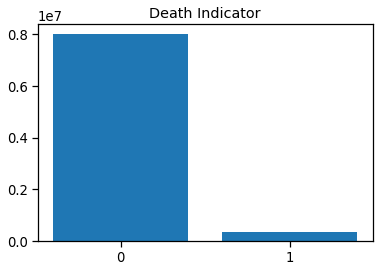

In [26]:
# Death indicator

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_morte['index'], height = count_morte.MORTE, tick_label = count_morte['index'])

plt.title('Death Indicator')

Text(0.5,1,'Instruction Level of the Patient')

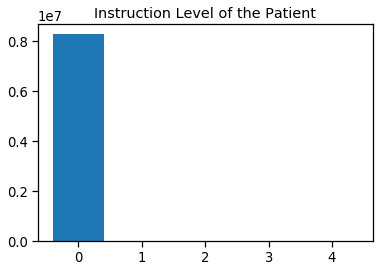

In [27]:
# Instruction Level of the patient (i.e. education level)

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_instru['index'], height = count_instru.INSTRU, tick_label = count_instru['index'])

plt.title('Instruction Level of the Patient')

This variable seems to be populated mostly by 0's.

   index  GESTRISCO
0      1    8321594
1      0       8048


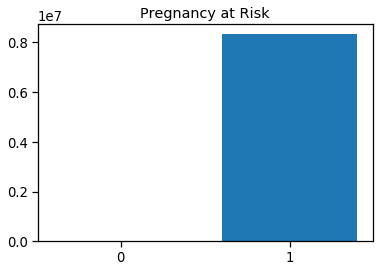

In [28]:
# Pregnancy at risk

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_gest['index'], height = count_gest.GESTRISCO, tick_label = count_gest['index'])

plt.title('Pregnancy at Risk')

print(count_gest)

*This variable seems off. It is not possible to be male and pregnant at risk.*

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text xticklabel objects>)

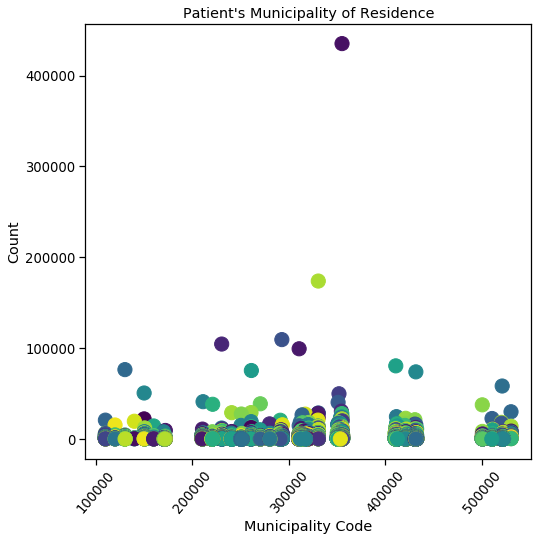

In [31]:
# Plot municipalities of patients

colors = np.random.rand(len(count_muni))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_muni['index'], y = count_muni['MUNIC_RES'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel('Municipality Code')

plt.title("Patient's Municipality of Residence")

plt.xticks(rotation = 50)

   index  NACIONAL
0     10   8298661
1     55     11130
2     22      2628
3     23      2183
4     45      1468


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

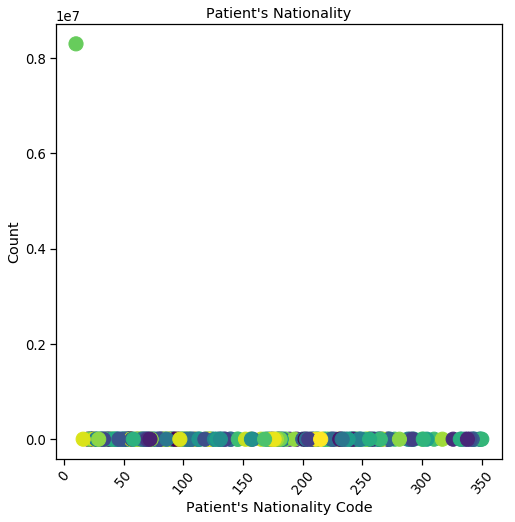

In [42]:
print(count_naci.head(5))

# Plot Top 20 nationalities of patients

colors = np.random.rand(len(count_naci))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_naci['index'], y = count_naci['NACIONAL'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Nationality Code")

plt.title("Patient's Nationality")

plt.xticks(rotation = 50)

Most common nationality is 10. 

    index     CBOR
0       0  8328783
1  225125      436
2  515105      131
3  225265       67
4  225133       49


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]), <a list of 7 Text xticklabel objects>)

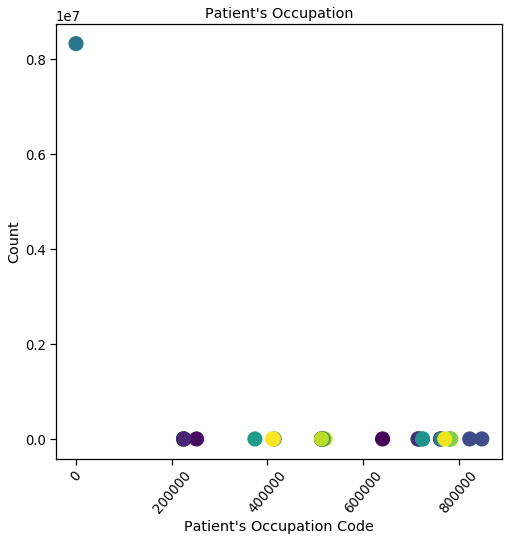

In [45]:
print(count_cbor.head(5))

# Plot occupations of patients

colors = np.random.rand(len(count_cbor))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_cbor['index'], y = count_cbor['CBOR'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Occupation Code")

plt.title("Patient's Occupation")

plt.xticks(rotation = 50)

>> This is for the most part 0 (i.e. empty)

   index  RACA_COR
0      3   2947820
1      1   2751700
2     99   2203827
3      2    290747
4      4    118092


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

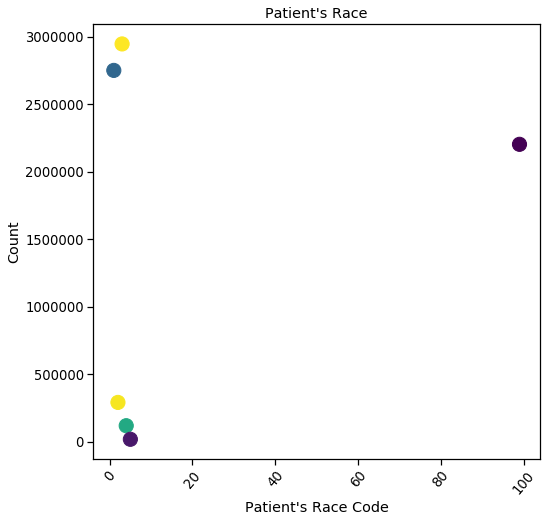

In [46]:
print(count_raca.head(5))

# Plot Race of patients

colors = np.random.rand(len(count_raca))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_raca['index'], y = count_raca['RACA_COR'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Race Code")

plt.title("Patient's Race")

plt.xticks(rotation = 50)

There are 2,203,827 marked as 99 or unknown. This is 26% of the available data.

In [53]:
#Replace 99's with np.nan

pat_charc_data['RACA_COR'] = pat_charc_data['RACA_COR'].replace(to_replace = 99, value = np.nan)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text xticklabel objects>)

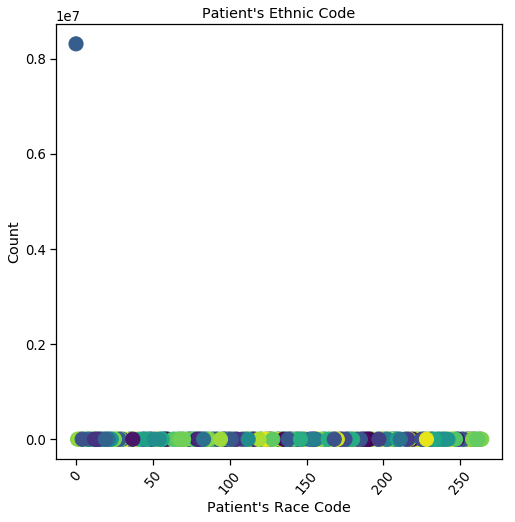

In [34]:
# Plot ethnicities of patients

colors = np.random.rand(len(count_etnia))

plt.figure(figsize=(8, 8))

plt.scatter(x = count_etnia['index'], y = count_etnia['ETNIA'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Race Code")

plt.title("Patient's Ethnic Code")

plt.xticks(rotation = 50)

>> *There are many 0's. However, this makes sense because this field is only used if the patient is a certain race category.*

> **Create plots of Continous Variables**

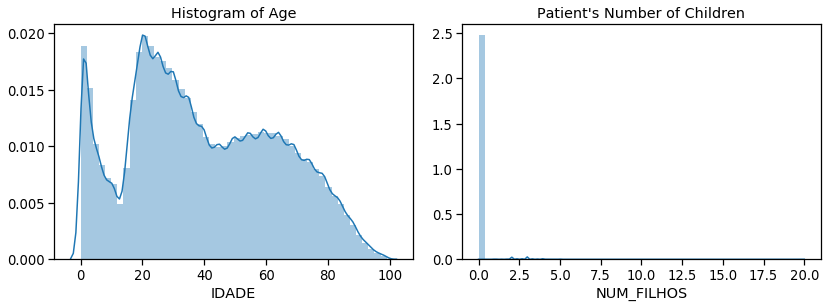

In [49]:
# Plot age variable

plt.subplot(221)

sns.distplot(pat_charc_data.IDADE)

plt.title('Histogram of Age')

# Plot patient's number of children variable

plt.subplot(222)

sns.distplot(pat_charc_data['NUM_FILHOS'].dropna())

plt.title("Patient's Number of Children")

plt.tight_layout(rect=(2, 2, 4, 4))

+ Age has a three peaks.

+ Patients number pf children is mostly 0's.

#### Demographic Features Selection

Based on the findings of exploratory data analysis I will use the following demographic features due to the fact that they are fairly complete and there is no reasons to suspect data entry errors. 
    
+ **Municipality of Residence**

+ **Age**

+ **Nationality**

+ **Race**

+ **Ethnicity**

+ **Death Indicator**

I will drop the following columns due to either large amounts of missing values or suspicion of serious data entry errors.
    
+ **Pregnancy ar risk**

+ **Instruction Level**

+ **Occupation**

+ **Patient's Number of Children**

In [54]:
pat_charc_data_clean = pat_charc_data[['MUNIC_RES','SEXO','IDADE','MORTE','NACIONAL','RACA_COR','ETNIA']]

## Explore Cleaned Patient Demographic Data

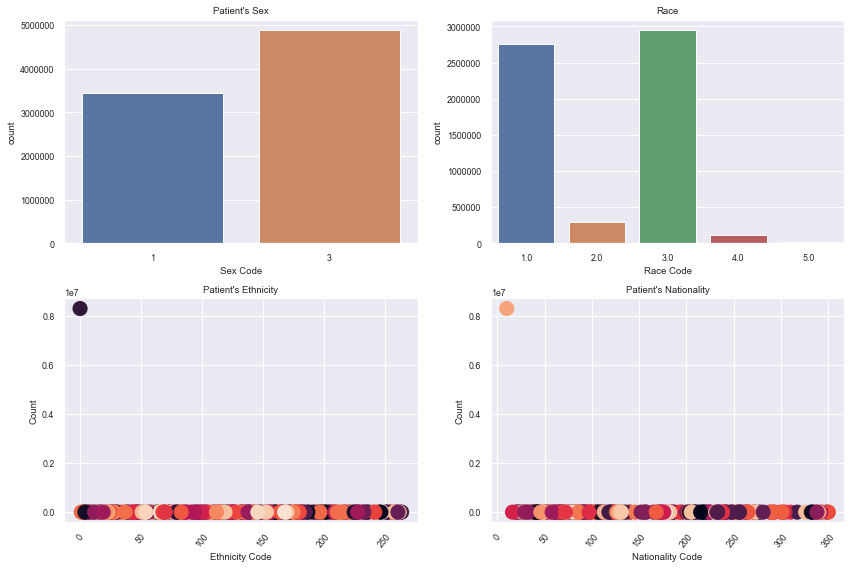

In [86]:
#Plot Patient Sex

plt.subplot(221)

sns.countplot(pat_charc_data_clean['SEXO'])

plt.title("Patient's Sex")

plt.tight_layout(rect=(2, 2, 4, 4))

plt.xlabel('Sex Code')

# Plot Patient's Race

plt.subplot(222)

sns.countplot(pat_charc_data_clean['RACA_COR'])

plt.title("Race")

plt.xlabel('Race Code')


#Plot Patient's Ethncity

count_etnia = pd.DataFrame(pat_charc_data_clean.ETNIA.value_counts()).reset_index()

plt.subplot(223)

colors = np.random.rand(len(count_etnia))

plt.scatter(x = count_etnia['index'], y = count_etnia['ETNIA'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xticks(rotation = 50)

plt.title("Patient's Ethnicity")

plt.xlabel('Ethnicity Code')

#Plot Patient's Nationality

count_nacional = pd.DataFrame(pat_charc_data_clean.NACIONAL.value_counts()).reset_index()

plt.subplot(224)

colors = np.random.rand(len(count_nacional))

plt.scatter(x = count_nacional['index'], y = count_nacional['NACIONAL'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xticks(rotation = 50)

plt.title("Patient's Nationality")

plt.xlabel('Nationality Code')

plt.tight_layout(rect=(2, 2, 4, 4))


Text(0.5,0,'Death Indicator')

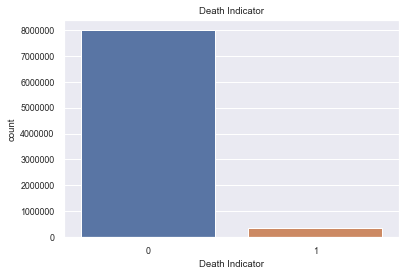

In [85]:
#Plot Patient Death Indicator

sns.countplot(pat_charc_data_clean['MORTE'])

plt.title("Death Indicator")

plt.xlabel('Death Indicator')

In [87]:
pat_charc_data_clean.describe()

,MUNIC_RES,SEXO,IDADE,MORTE,NACIONAL,RACA_COR,ETNIA
count,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,8.329642e+06,6.125815e+06,8.329642e+06
mean,3.277015e+05,2.171629e+00,3.968477e+01,4.134487e-02,1.015701e+01,2.079120e+00,2.537580e-01
std,9.430158e+04,9.851618e-01,2.412030e+01,1.990866e-01,3.466309e+00,1.013364e+00,6.505445e+00
min,1.100010e+05,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00
25%,2.614500e+05,1.000000e+00,2.100000e+01,0.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00
50%,3.303900e+05,3.000000e+00,3.600000e+01,0.000000e+00,1.000000e+01,3.000000e+00,0.000000e+00
75%,4.101000e+05,3.000000e+00,5.900000e+01,0.000000e+00,1.000000e+01,3.000000e+00,0.000000e+00
max,5.301800e+05,3.000000e+00,9.900000e+01,1.000000e+00,3.500000e+02,5.000000e+00,2.640000e+02


#### Patient Age

Text(0.5,132.104,'Age')

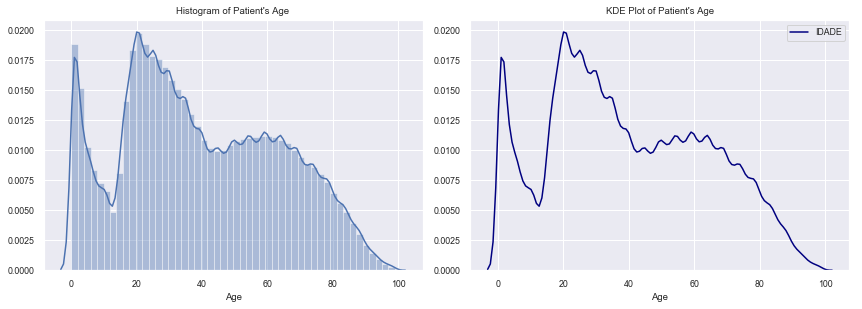

In [88]:
# Plot age variable

plt.subplot(221)

sns.distplot(pat_charc_data.IDADE)

plt.title("Histogram of Patient's Age")

plt.xlabel('Age')

plt.subplot(222)

sns.kdeplot(pat_charc_data.IDADE, color= 'navy')

plt.title("KDE Plot of Patient's Age")

plt.tight_layout(rect=(2, 2, 4, 4))

plt.xlabel('Age')

> Plot Heat Map of Demographics Features

In [89]:
patient_chara_corr = pat_charc_data_clean.corr()

Text(0.5,1,'Heat Map of Patient Characteristics')

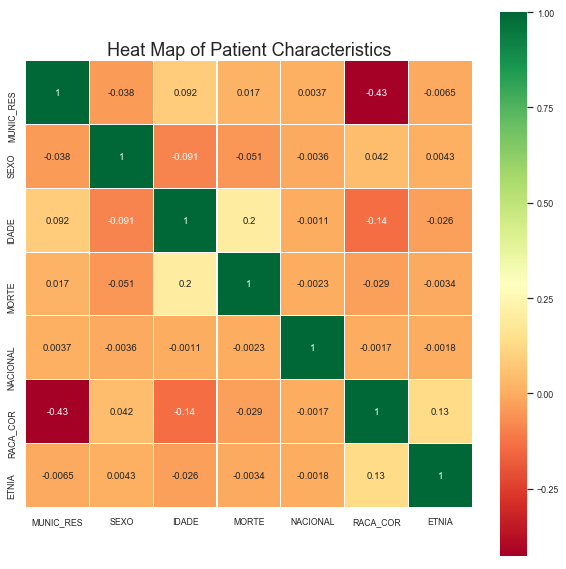

In [90]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=.8)

sns.heatmap(patient_chara_corr, square=True, linewidths=.05, annot=True, cmap='RdYlGn')

plt.title('Heat Map of Patient Characteristics', fontsize = 18)

### Diagnostic Data Bloc  

In [94]:
diag_data = AIH_sample[diag]

diag_data.head(10)

,DIAG_PRINC,DIAG_SECUN
index_name,,
0,O623,0
1,P599,0
2,O800,0
3,S524,0
4,L989,0
5,I10,0
6,S367,0
7,A90,0
8,K299,0


In [95]:
diag_data.describe()

,DIAG_SECUN
count,8329642.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Secondary diagnosis is empty.

In [96]:
count_diag = pd.DataFrame(diag_data.DIAG_PRINC.value_counts()).reset_index()

In [103]:
count_diag['log'] = np.log(count_diag['DIAG_PRINC'])

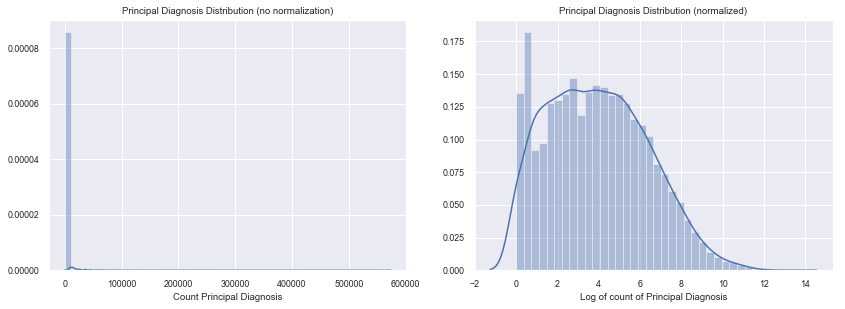

In [106]:
# Histogram of diagnosis counts (not normalized)

plt.subplot(221)

sns.distplot(count_diag.DIAG_PRINC)

plt.title("Principal Diagnosis Distribution (no normalization)")

plt.xlabel('Count Principal Diagnosis')

# Histogram of diagnosis counts normalized using log

plt.subplot(222)

sns.distplot(count_diag.log)

plt.title("Principal Diagnosis Distribution (normalized)")

plt.xlabel('Log of count of Principal Diagnosis')

plt.tight_layout(rect=(2, 2, 4, 4))

### Hospitalization Services Data Bloc

In [207]:
hospi_serv_data = AIH_sample[hospi_serv]

In [208]:
hospi_serv_data.head(10)

,UTI_MES_TO,MARCA_UTI,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,DT_INTER,DT_SAIDA,COBRANCA,...,DIAS_PERM,CONTRACEP1,CONTRACEP2,INSC_PN,CID_ASSO,CID_MORTE,COMPLEX,MARCA_UCI,ESPEC,CAR_INT
index_name,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,2,303100044,303100044,20150724,20150726,12,...,2,0,0,0,0,0,2,0,3,2
1,0,0,0,3,3,303160047,303160047,20150819,20150822,12,...,3,0,0,0,0,0,2,0.0,7,2
2,0,0,0,2,2,310010039,310010039,20150914,20150916,61,...,2,0,0,0,0,0,2,0,2,2
3,0,0,0,3,3,408020423,408020423,20150307,20150310,12,...,3,0,0,0,0,0,2,0,1,2
4,0,0,0,0,12,401020029,401020029,20151030,20151110,27,...,11,0,0,0,0,0,2,00,1,2
5,0,0,0,7,7,305020048,303060107,20150823,20150830,12,...,7,0,0,0,0,0,2,00,3,2
6,0,0,0,0,6,407030140,407030140,20150703,20150709,12,...,6,0,0,0,0,0,2,0.0,1,2
7,0,0,0,2,2,303010010,303010010,20151216,20151218,12,...,2,0,0,0,0,0,2,0,3,2
8,0,0,0,23,28,303070064,303070064,20151008,20151105,12,...,28,0,0,0,0,0,2,0,3,2


### Financial Data Bloc 

In [210]:
finan_data = AIH_sample[finan]

In [211]:
finan_data.head(10)

,VAL_SH,VAL_SP,VAL_TOT,VAL_UTI,US_TOT,FINANC,REGCT,REMESSA,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI
index_name,,,,,,,,,,,,,
0,168.35,23.99,192.34,0.0,48.44,6,7102,HM35503001N201508.DTS,0.0,0.0,0.0,0.0,0.0
1,247.75,38.79,286.54,0.0,72.17,6,0,HE53000001N201508.DTS,0.0,0.0,0.0,0.0,0.0
2,284.60,241.00,525.60,0.0,136.87,6,0,HE16000001N201510.DTS,0.0,0.0,0.0,0.0,0.0
3,459.06,197.92,656.98,0.0,219.72,6,0,HM15014001N201503.DTS,0.0,0.0,0.0,0.0,0.0
4,363.59,142.60,506.19,0.0,125.29,6,7102,HM31062001N201512.DTS,0.0,0.0,0.0,0.0,0.0
5,203.80,41.87,245.67,0.0,61.88,6,0,HM31480001N201508.DTS,0.0,0.0,0.0,0.0,0.0
6,952.18,196.64,1148.82,0.0,315.60,6,0,HM52011001N201507.DTS,0.0,0.0,0.0,0.0,0.0
7,245.44,58.32,303.76,0.0,75.18,6,0,HM23025001N201512.DTS,0.0,0.0,0.0,0.0,0.0
8,700.02,111.36,811.38,0.0,208.04,6,0,HM35537001N201511.DTS,0.0,0.0,0.0,0.0,0.0


### Identification Information Data Bloc

In [212]:
meta_data = AIH_sample[meta]

In [213]:
meta_data.head(10)

,UF_ZI,ANO_CMPT,MES_CMPT,CGC_HOSP,N_AIH,IDENT,CEP,NAT_JUR,NATUREZA,GESTAO,...,COD_IDADE,SEQ_AIH5,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,CNES,SEQUENCIA,HOMONIMO
index_name,,,,,,,,,,,,,,,,,,,,,
0,355030,2015,8,6.092217e+13,3515115312016,1,4339150,3999,61,1,...,4,0,0,0,0,0,0,2077388,19929,0
1,530000,2015,8,3.947000e+11,5315100954273,1,70335900,1023,40,2,...,2,0,0,0,134,1,69032122134,10464,9501,0
2,160000,2015,10,6.097574e+13,1615100385789,1,68900010,3999,61,2,...,4,0,0,0,0,1,23003952749,2020890,2980,0
3,150140,2015,3,4.938437e+12,1515101116320,1,67010000,2062,20,1,...,4,0,0,0,0,0,0,2332914,1219,0
4,310620,2015,12,1.984393e+13,3115109220069,1,39725000,1147,0,1,...,4,0,0,0,0,1,51841371653,26921,4407,0
5,314800,2015,8,2.334796e+13,3115117350950,1,38770000,2062,20,1,...,4,0,0,0,0,0,0,2196972,922,0
6,520110,2015,7,NaN,5215101323388,1,75083440,1201,40,1,...,4,0,0,0,0,0,0,3771962,4717,0
7,230250,2015,12,NaN,2315107999820,1,63260000,3999,0,1,...,4,0,0,0,0,0,0,2480646,673,0
8,355370,2015,11,7.212721e+13,3515123985241,1,15900000,3999,0,1,...,4,0,0,0,0,0,0,2078295,213,0
